## Finding Heavy Traffic Indicators on the I-94
We are going to look at and analyze a dataset about the westbound traffic on I-94 Interstate highway. The dataset has been made available at: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

The goal of our analysis is to try to determine a few indicators of heavy traffic on the I-94. These indicators could include type of weather, time of day, time of week, etc.

In [2]:
#import libraries
import pandas as pd

#read the data
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#view first 5 rows
print(traffic.head(5))

#view last 5 rows
print(traffic.tail(5))

#find more info on data set
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

The data set has 48204 rows and 9 columns. Each row describes traffic and weather data every hour starting at `2012-10-02 09:00:00` and ending at `2018-09-30 23:00:00`. This represents the hourly data for almost 6 years.

The data was recorded at a station midway between Mineapolis and St.Paul - because of this we wont make generalizations about the I-94 as a whole.

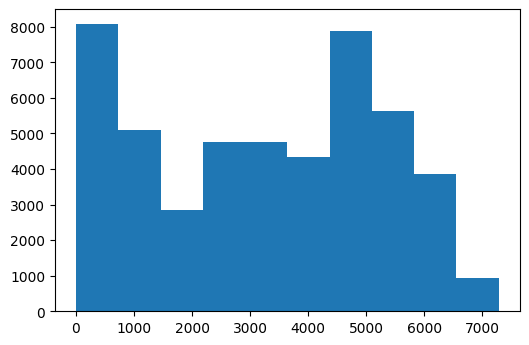

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [3]:
#import libraries
import matplotlib.pyplot as plt
%matplotlib inline

#plot histogram to see distribution of traffic_volume column
plt.hist(traffic['traffic_volume'])
plt.show()

#look up some key statistics on traffic_volume column
print(traffic['traffic_volume'].describe())

Westbound traffic on the I-94's highest volume was 7280 cars in one hour. The lowest amount was 0. 25% of the time westbound traffic had at least 1193 cars in an hour, but on average there was about 3260 cars in an hour, and 75% of the time there was 4933 cars per hour. These are large differences. One possibility that could contribute to varying volume of cars could be the time of day. Let's see if there is a noticeable difference in the volume of cars traveling westbound and the I-94 near Mineapolis and St. Paul

## Traffic Volume: Day vs. Night
To look into the difference of traffic volume between day and night we will need to split the data into two parts.
- Daytime data: 7am-7pm
- Nighttime data: 7pm to 7am

In [4]:
#convert date_time column to datetime data type
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#isolate night traffic data
night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

#isolate the day traffic data
day = traffic[(traffic['date_time'].dt.hour < 19) & (traffic['date_time'].dt.hour >= 7)]
print(day.shape)


(24327, 9)
(23877, 9)


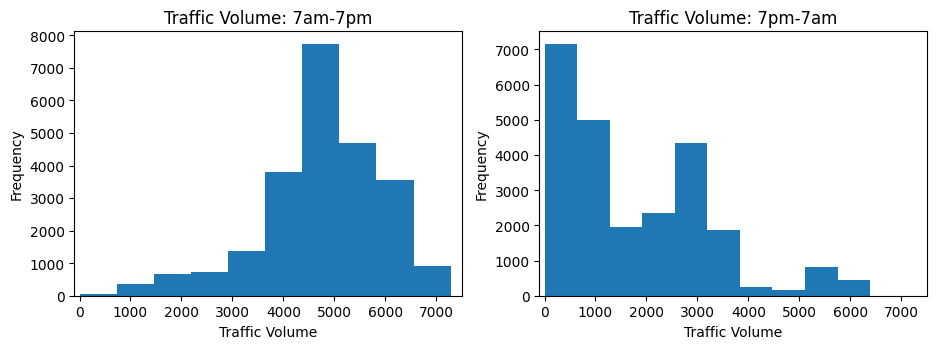

In [5]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: 7am-7pm')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: 7pm-7am')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)

plt.show()

In [6]:
print('Daytime Traffic Volume Data')
print(day['traffic_volume'].describe())
print('\n')
print('Nighttime Traffic Volume Data')
print(night['traffic_volume'].describe())

Daytime Traffic Volume Data
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Nighttime Traffic Volume Data
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators
Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [10]:
#get monthly traffic averages for daytime traffic
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-10-c299d59a953c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

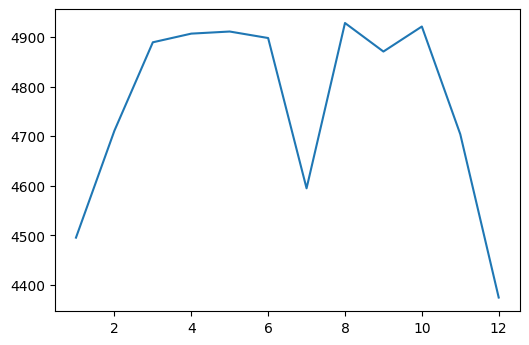

In [14]:
plt.plot(by_month.index, by_month['traffic_volume'])
plt.show()

It appears that there is less traffic in the winter months(November-March) One outlier is the month of July. For some reason there is a sever drop off in traffic in july. Lets try to look at the month of July and see how traffic changed over the years.

<ipython-input-19-d376884b2fd4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



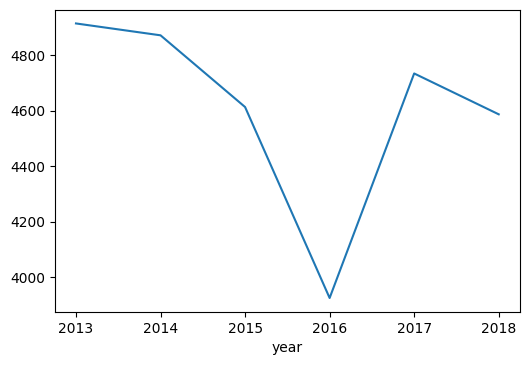

In [19]:
day['year'] = day['date_time'].dt.year
july_only = day[day['month'] == 7]
july_only.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Looking at the chart above traffic seemed high in all years in July except for 2016. It is likely the highway was under construction or closed for parts of July in 2016.

## Time Indicators - Day of the week

<ipython-input-20-c551369626fa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



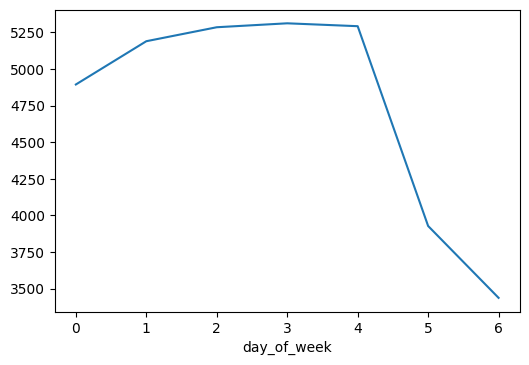

In [20]:
day['day_of_week'] = day['date_time'].dt.dayofweek
by_day_of_week = day.groupby('day_of_week').mean()
by_day_of_week['traffic_volume'].plot.line()
plt.show()


Traffic seems to be heaviest on business days Mon-Fri remaining almost above 5000 cars/h. On weekends we see a 20-30% drop in 
traffic ranging between 4000-3500 cars/h on Saturday and Sunday respectively.

## Time Indicators - Time of Day
Now we are going to see if the time of day effects the flow of traffic at all, but we are going to split business days and weekends and look at them seperately.

In [23]:
#create hour column
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['day_of_week'] <= 4] #day 4 == Friday
weekend_day = day.copy()[day['day_of_week'] >= 5] #day 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend_day.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-23-a65ee57867b4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



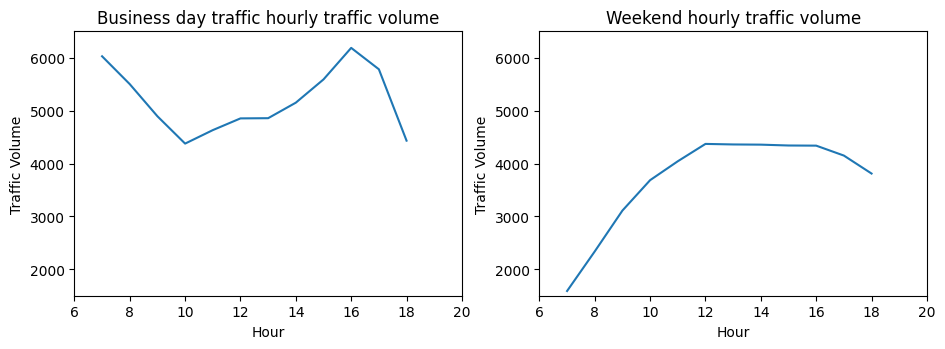

In [35]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1500, 6500)
plt.xlim(6,20)
plt.ylabel('Traffic Volume')
plt.xlabel('Hour')
plt.title('Business day traffic hourly traffic volume')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500, 6500)
plt.xlim(6,20)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Weekend hourly traffic volume')
plt.show()

We can see as noted earlier, traffic volume on the weekend overall is much lower than on business days. Business days are busiest around 7-8 and again around 4-5. These times represent when most people are making their daily commute to and from work. One Difference between weekend traffic is that it actually peaks around 12pm and stays around that level for 4 hours and then begins to drop off again.

To summarize our findings so far:
- Traffic is higher during warmer months
- Traffic is higher during business days
- Traffic is highest on business days around 07:00 and 16:00


## Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [37]:
#find correlation of all columns to traffic_volume
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The `temp` column shows the highest correlation to traffic volume, but it is only +0.13. Overall it appears there is a very weak correlation of weather on traffic volume.

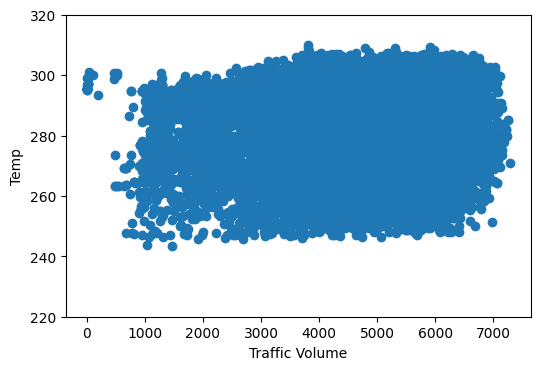

In [48]:
#scatter plot of temp vs traffic volume
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temp')
plt.ylim(220, 320)
plt.show()

## Types of Weather
Lets take a look at the average traffic volume based on the type of weather and see if there are any outliers.

AttributeError: 'AxesSubplot' object has no attribute 'figsize'

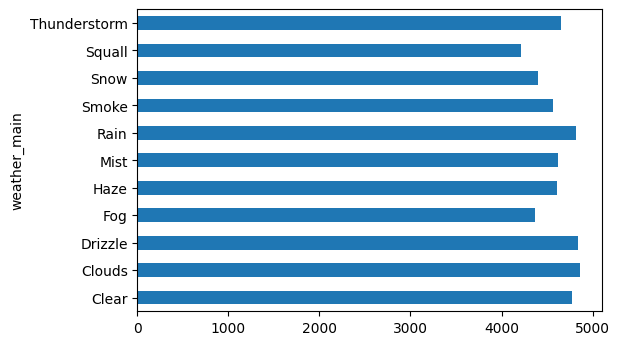

In [54]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Type of Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Type')
plt.show()

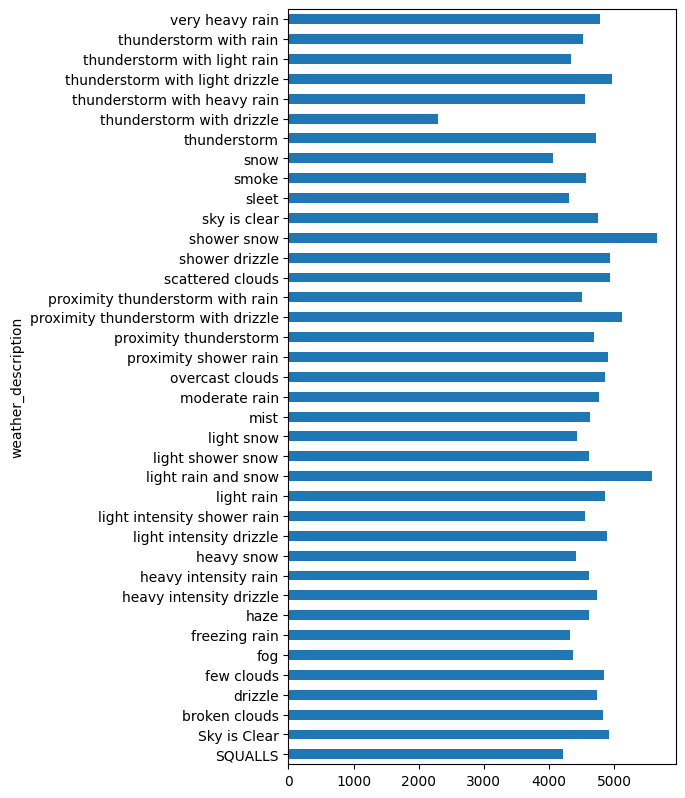

In [55]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
- Time indicators
 - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
 - The traffic is usually heavier on business days compared to the weekends.
 - On business days, the rush hours are around 7 and 16.
- Weather indicators
 - Shower snow
 - Light rain and snow
 - Proximity thunderstorm with drizzle